<img src="https://drive.google.com/uc?export=view&id=1250UmUR96Dr69gzGotxrGJg0v1v6t1SL" width="500">

**В этом ноутбуке приведены примеры работы с различными распределениями, которые помогут при решении ДЗ; а также в качестве бонуса наглядная визуализация ЦПТ.**

PS: для удобства восприятия некоторые необходимые импорты будем делать в соответствующих ячейках. Но по стандартам PEP-8 оформления кода на Python их принято писать всегда в начале ноутбука в первой ячейке.

In [ ]:
import numpy as np
import seaborn as sns

## ‼️ Небольшая шпаргалка, которая понадобится далее...

‼️ Метод `cdf` (Cumulative Distribution Function) **по значению `X` случайной величины рассчитывает значение функции распределения `P(X ≤ x)`**. Применим для **любых типов распределений** — как дискретных, так и непрерывных.

‼️ Метод `pmf` (Probability Mass Function) **по значению `X` случайной величины возвращает вероятность `P(X = x)`**. Применим **только для дискретных распределений**.

‼️ Метод `pdf` (Probability Density Function) **по значению `X` возвращает значение функции плотности вероятности `f(x)`**, которая описывает распределение **непрерывной случайной величины**.

‼️ при визуализации распределений через `sns.displot` необходимо указывать параметр `kde=False` для дискретных распределений, а `kde=True` - для непрерывных.

## Часть 1. Дискретные распределения

### 1.1. Равномерное распределение
Вспомним задачу с "честным" кубиком. Также мы можем определить ряд распределения для дискретного равномерного распределения с помощью Python.

Импортируем библиотеку `numpy` и функцию `randint()` из библиотеки `scipy`, предназначенную для моделирования равномерного дискретного распределения. Попробуем рассчитать вероятности для случайной величины, которая принимает значения от 1 включительно до 7 не включительно.

In [ ]:
from scipy.stats import randint

# Задаём возможные значения случайной величины
x = np.arange(1, 7)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 7)
# Вычисляем вероятности выпадения каждого значения случайной величины
pmf = disc_uni_dist.pmf(x)
print(pmf)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


Получаем вероятности для каждого из шести значений:)

Также мы можем найти кумулятивную вероятность для распределения, то есть для каждого $x_i$ вероятность того, что случайная величина примет значение $x_i$ или меньше:

In [ ]:
# Рассчитаем кумулятивную вероятность
cdf = disc_uni_dist.cdf(x)
print(cdf)

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


### 1.2. Распределение Бернулли
**Посмотрим на примере следующей задачи:**

*Вы стреляете по мишени в тире. Вероятность попасть составляет 0.6. В случае успеха Вы выиграете плюшевого медведя стоимостью 3000 рублей, а в случае промаха — не выиграете ничего. У Вас есть только один выстрел.*

*Какой должна быть стоимость билета, чтобы игра была честной - то есть чтобы цена билета равнялась ожидаемому выигрышу, а значит, не уводила в убыток продавца или Вас при большом количестве выстрелов?*

С помощью специальной функции `bernoulli.rvs()` из библиотеки `scipy` мы можем смоделировать распределение Бернулли и, например, увидеть ожидаемое соотношение попаданий и промахов для решённой задачи, если будет сделано 500 выстрелов:

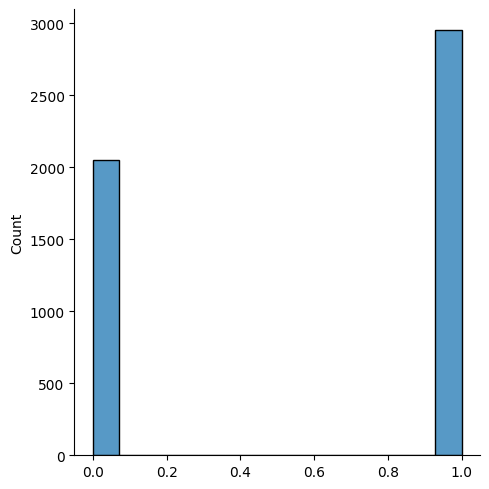

In [ ]:
from scipy.stats import bernoulli

data = bernoulli.rvs(size=5000, p=0.6)
sns.displot(data, kde=False)

In [ ]:
200 / 300

0.6666666666666666

А ответ на вопрос задачи: `0.6 * 3000 + 0.4 * 0 = 1800` р. за билет.

### 1.3. Биномиальное распределение
**Задача следующая:**

*Производитель гаджетов знает, что 20 % производимых им товаров — бракованные.
Если он производит десять изделий в день, какова вероятность того, что не более двух из них бракованные?*

Решение задачи: используем формулу ФР и вычислим вероятность того, что за день производится от восьми до десяти небракованных изделий:

$\begin{pmatrix} 10 \\ 8 \end{pmatrix} (0.8)^8 (0.2)^2 + \begin{pmatrix} 10 \\ 9 \end{pmatrix} (0.8)^9 (0.2)^1 + \begin{pmatrix} 10 \\ 10 \end{pmatrix} (0.8)^{10} \approx 0.678$

Конечно, это выражение очень сложное с точки зрения вычислений, поэтому для нахождения ответа можно воспользоваться специальными функциями Python:

In [ ]:
import scipy

scipy.stats.binom.pmf(8,10,0.8) + scipy.stats.binom.pmf(9,10,0.8) + scipy.stats.binom.pmf(10,10,0.8)

np.float64(0.6777995264)

Как и для распределения Бернулли, для биномиального распределения можно смоделировать какое-то количество попыток и получить результат. Например, можно смоделировать биноминальное распределение с параметром p = 0.5 и количеством испытаний, равным 10, и реализовать 1000 попыток:

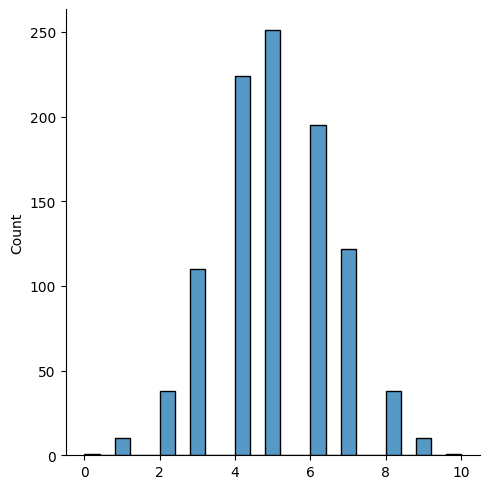

In [ ]:
data = np.random.binomial(n=10, p=0.5, size=1000)
sns.displot(data, kde=False)

### 1.4. Распределение Пуассона
**Задача:**

*Колл-центр получает в среднем 4.5 звонка за каждые пять минут. Каждый оператор может обработать один из этих вызовов в течение пяти минут. Если вызов получен, но оператор  не может его принять, то вызывающий абонент будет переведён в режим ожидания ответа.*

*Если вызовы следуют распределению Пуассона, какое минимальное количество операторов необходимо колл-центру, чтобы вероятность попадания вызова на удержание была не более 0.1?*

Решение: рассчитаем вероятности для всех возможных количеств операторов, пока не получим вероятность того, что вызов находится на удержании, которая будет меньше 10%:

<img src="https://drive.google.com/uc?export=view&id=1-Y9GvnI55Ix4LBJyIio1heURLk-KmCLV" width="500">


В качестве параметра $\lambda$ мы берём среднее количество звонков, так как это наше ожидаемое число событий, а в качестве $k$ — количество операторов, т. к. в данный период времени мы сможем принять столько звонков (один оператор принимает один звонок).

Получаем, что колл-центру необходимо нанять на работу хотя бы семь операторов.

Разумеется, все эти значения можно было бы рассчитать намного проще с использованием функций Python. Например, для пяти операторов мы бы получили следующее выражение:

In [ ]:
import scipy

scipy.stats.distributions.poisson.pmf(5, 4.5)

np.float64(0.17082685848611215)

Также можно смоделировать распределение Пуассона. Например, будем рассматривать 1000 реализаций случайной величины, у которой $\lambda = 3$:

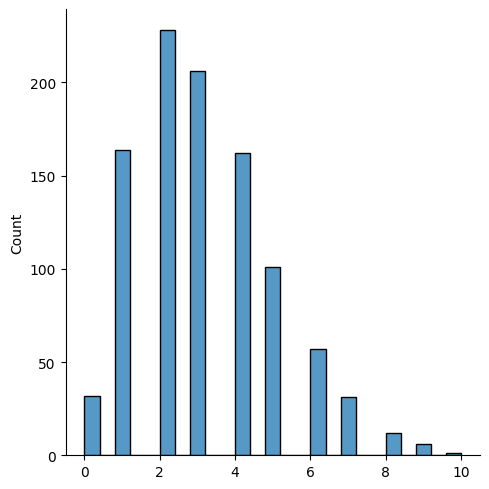

In [ ]:
data = np.random.poisson(lam=3, size=1000)
sns.displot(data, kde=False)

## Часть 2. Непрерывные распределения

### 2.1. Равномерное распределение

**Возьмём простой пример:** сгенерируем случайные числа из равномерного непрерывного распределения на отрезке [10, 40]:

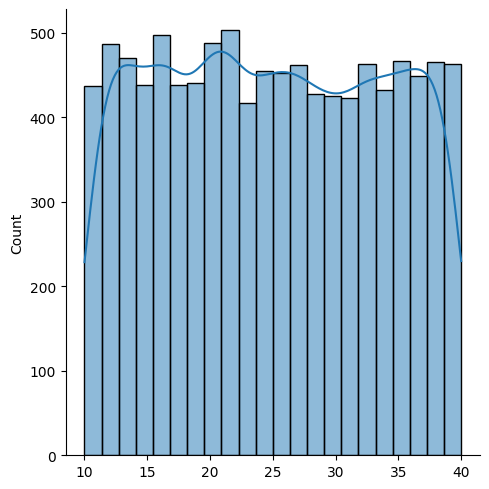

In [ ]:
from scipy.stats import uniform

data = uniform.rvs(size=10000, loc=10, scale=30)
sns.displot(data, kde=True)

### 2.2. Нормальное распределение

*Согласно ЦПТ, при большом количестве наблюдений распределение выборочного среднего любой случайной величины с конечной дисперсией стремится к нормальному.*

Поэтому нормальное распределение — хорошая модель для многих агрегированных данных!




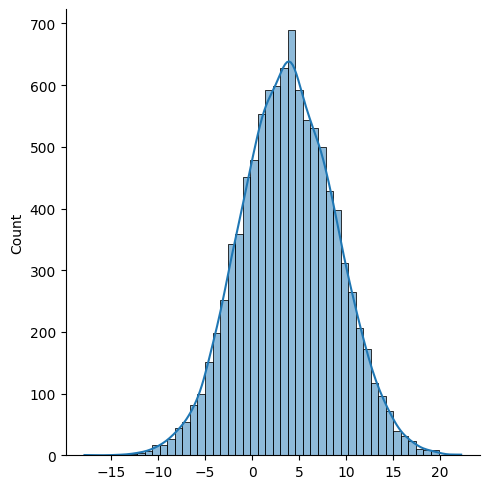

In [ ]:
from scipy.stats import norm

data = norm.rvs(size=10000, loc=4, scale=5)
sns.displot(data, kde=True, bins=50)

### 2.3. Экспоненциальное распределение

Это распределение вероятностей времени между событиями в процессе Пуассона.

Если помните, в процессе Пуассона нам известно, сколько событий происходит за какой-то промежуток времени.

В реальной жизни интервалы времени между событиями обычно разные. Например, если мы анализируем количество поступающих на рабочую почту писем, то оно может быть разным в зависимости от дня и времени суток. Но если мы возьмём небольшой временной интервал, в течение которого скорость примерно постоянная, например с 10:30 до 14:30 в понедельник, экспоненциальное распределение можно использовать как хорошую приблизительную модель для времени до поступления следующего письма.

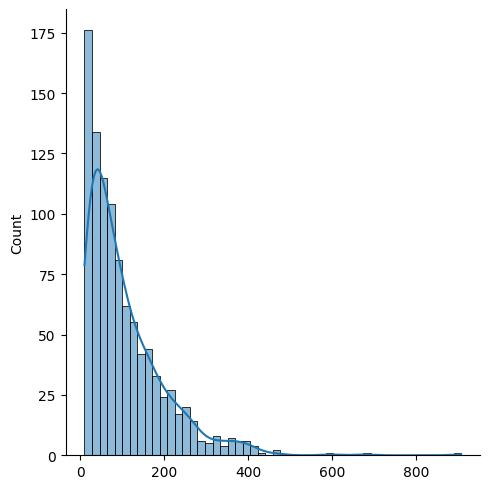

In [ ]:
from scipy.stats import expon

data = expon.rvs(scale=100, loc=10, size=1000)
sns.displot(data, kde=True, bins=50)

In [ ]:
import numpy as np
import plotly.graph_objs as go

# Истинное распределение (не нормальное)
population = np.random.exponential(scale=1.0, size=100_000)

# Размеры выборок, которые будем визуализировать
sample_sizes = [1, 2, 5, 10, 20, 50, 100]
n_samples = 1000  # сколько выборок брать для усреднения

frames = []
sliders = []

# Построим трасы для разных размеров выборок
for i, sample_size in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.choice(population, sample_size)) for _ in range(n_samples)]
    hist = np.histogram(sample_means, bins=50, density=True)
    x = (hist[1][:-1] + hist[1][1:]) / 2
    y = hist[0]

    frames.append(go.Frame(
        data=[go.Bar(x=x, y=y)],
        name=f'{sample_size}'
    ))

# Начальный график — для sample_size = 1
init_sample_size = sample_sizes[0]
init_sample_means = [np.mean(np.random.choice(population, init_sample_size)) for _ in range(n_samples)]
hist = np.histogram(init_sample_means, bins=50, density=True)
x = (hist[1][:-1] + hist[1][1:]) / 2
y = hist[0]

fig = go.Figure(
    data=[go.Bar(x=x, y=y)],
    layout=go.Layout(
        title='Центральная предельная теорема (ЦПТ)',
        xaxis_title='Значение выборочного среднего',
        yaxis_title='Плотность',
        updatemenus=[dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='▶️ Запустить',
                          method='animate',
                          args=[None, {"frame": {"duration": 1000, "redraw": True},
                                       "fromcurrent": True}])]
        )]
    ),
    frames=frames
)

# Добавим слайдер
fig.update_layout(
    height=800,
    sliders=[{
        "steps": [
            {"method": "animate", "label": str(size), "args":
             [[str(size)], {"mode": "immediate", "frame": {"duration": 0}, "transition": {"duration": 0}}]
             }
            for size in sample_sizes
        ],
        "transition": {"duration": 0},
        "x": 0,
        "y": -0.15,
        "currentvalue": {"prefix": "Размер выборки: "}
    }]
)

fig.show()


## Успехов! 🤗